# Capstone Project- GROUP 5
# Loan Default Prediction using Machine Learning Techniques
## Batch Members:
# 1. Soham Das
# 2. Satyam Golhani
# 3. Karthikeyan D
# 4. Mohammad Illyas
# Batch Mentor : Vidhya Kannaiah

In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns",None)

In [5]:
df=pd.read_csv('prosperLoanData.csv')

In [6]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [7]:
df.shape

(113937, 81)

In [8]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [9]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
count             84853.000000  84853.000000              113937.000000   
mean                  4.072243      5.950067                   2.774209   
std                   1.673227      2.376501                   3.996797   
min                   1.000000      1.000000                   0.000000   
25%                   3.000000      4.000000                   1.000000   
50%                   4.000000      6.000000                   1.000000   
75%                   5.000000      8.000000                   3.000000   
max                   7.000000     11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min                    0.000000               0.000000              19.000000   
25%                   26.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  137.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       106333.000000    106333.000000               113240.000000   
mean            10.317192         9.260164                   26.754539   
std              5.457866         5.022644                   13.637871   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  Tot

In [10]:
# Duplicates data entry in loan data
df.duplicated().sum()

0

In [11]:
df.isnull().sum().sum()

1364086

In [12]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [14]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [15]:
df_loan = df.copy()

In [16]:
## Univariate Data Analysis

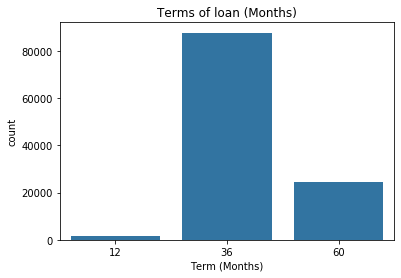

In [17]:
# Loan by term
base_color = sns.color_palette()[0]
sns.countplot(data=df_loan,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

In [18]:
type_count = df_loan['LoanStatus'].value_counts()
type_order = type_count.index

In [19]:
# Count of Loan by Loan Status
n_loan =df_loan.shape[0]
max_type_count = type_count[0]
max_prop = max_type_count/n_loan

In [20]:
tick_props = np.arange(0,max_prop,0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

In [21]:
tick_names

['0.00', '0.10', '0.20', '0.30', '0.40']

Text(0.5, 1.0, 'Proportion of Loan Status')

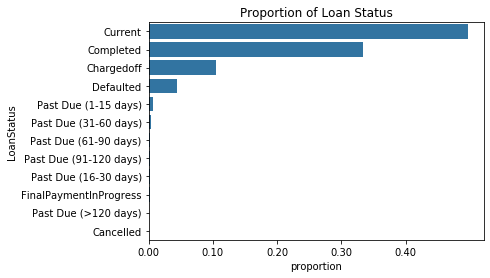

In [22]:
sns.countplot(data=df_loan,y='LoanStatus',color=base_color,order=type_order);
plt.xticks(tick_props*n_loan,tick_names)
plt.xlabel('proportion');
plt.title('Proportion of Loan Status')

Text(0.5, 1.0, 'Count of Prosper ratings')

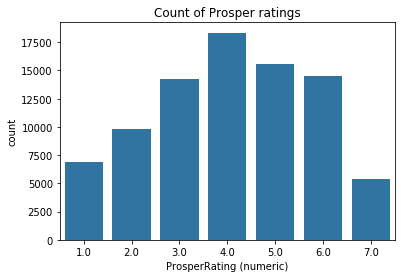

In [23]:
# Distribution of Prosper rating
sns.countplot(data=df_loan,x='ProsperRating (numeric)',color=base_color);
plt.title('Count of Prosper ratings')

In [24]:
df_loan['Year'] = df_loan['LoanOriginationQuarter'].str[-4:]

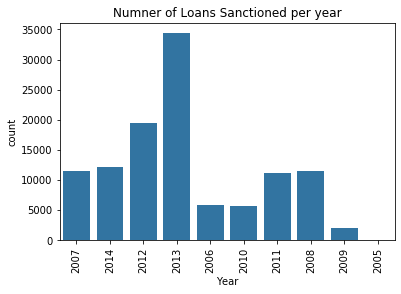

In [25]:
# Number of loans per year
sns.countplot(data=df_loan,x='Year',color=base_color);
plt.title('Numner of Loans Sanctioned per year')
plt.xticks(rotation=90);

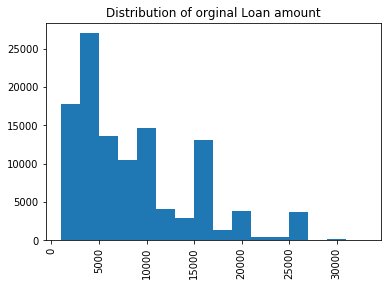

In [26]:
# Distribution of orginal Loan amount
bins = np.arange(1000,35000,2000)
plt.hist(data=df_loan,x='LoanOriginalAmount',color=base_color,bins=bins);
plt.title('Distribution of orginal Loan amount')
plt.xticks(rotation=90);

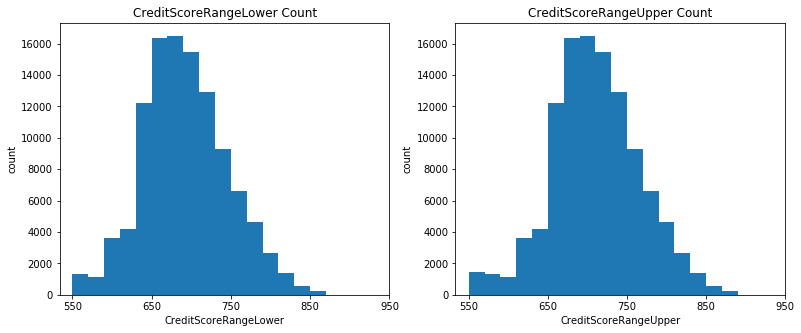

In [27]:
# Histogram for Credit Score ranges

plt.figure(figsize = [13, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(550, df_loan['CreditScoreRangeLower'].max(), 20)
plt.hist(data = df_loan, x = 'CreditScoreRangeLower', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeLower Count')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(550, df_loan['CreditScoreRangeUpper'].max(), 20)
plt.hist(data = df_loan, x = 'CreditScoreRangeUpper', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeUpper Count')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('count');

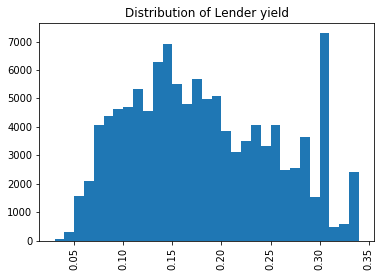

In [28]:
# Distribution of lender yield
bins = np.arange(.03,.34,.01)
plt.hist(data=df_loan,x='LenderYield',color=base_color,bins=bins);
plt.title('Distribution of Lender yield')
plt.xticks(rotation=90);

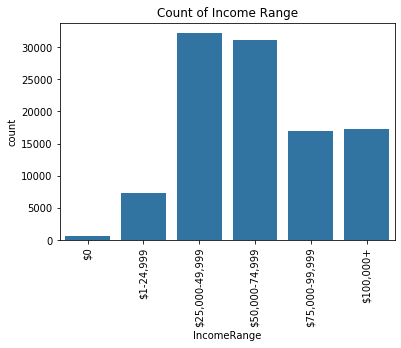

In [29]:
# Income range of borrower
order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sns.countplot(data=df_loan,x='IncomeRange',color=base_color,order=order);
plt.title('Count of Income Range')
plt.xticks(rotation=90);

In [30]:
## Bivariate Data Analysis

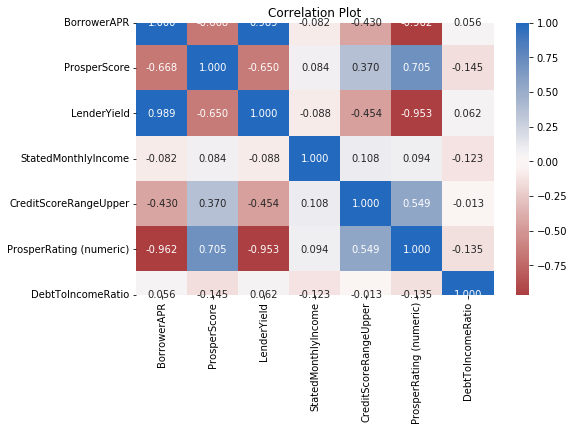

In [31]:
# correlation plot 

num_vars = ['BorrowerAPR', 'ProsperScore', 'LenderYield', 
            'StatedMonthlyIncome',  'CreditScoreRangeUpper','ProsperRating (numeric)','DebtToIncomeRatio']
plt.figure(figsize = [8, 5])
sns.heatmap(df_loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

In [32]:
# plot matrix: only 300 random loans are used to see the pattern more clearer

# sns.pairplot(df_loan)

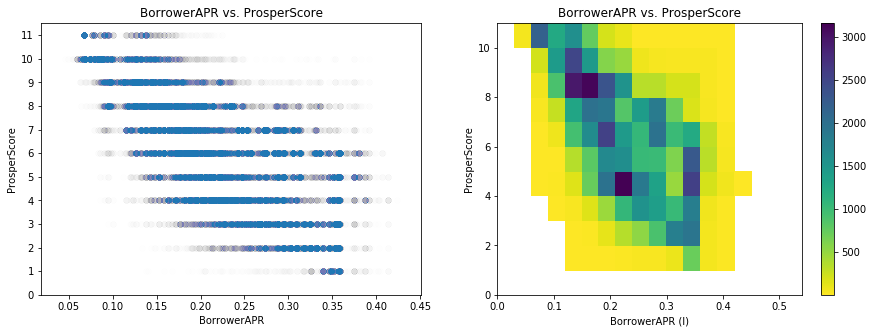

In [33]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_loan['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_loan, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

Here the relationship is evident, higher the prosper score is lower is Borrower APR and this makes sense because lower the risk attached with the borrower lower will be the APR.

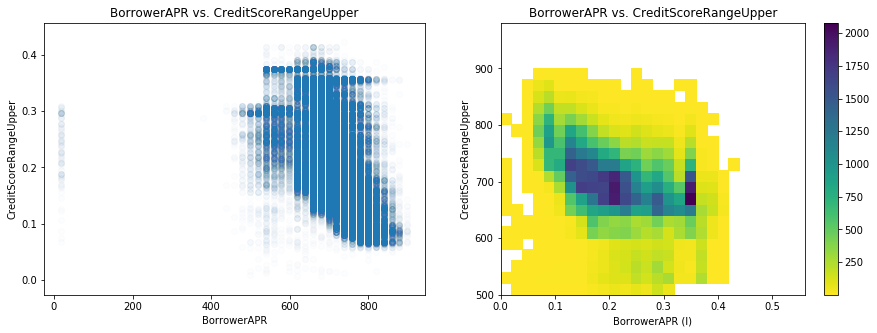

In [34]:
# scatter and heat plot for comparing BorrowerAPR and credit score upper range. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.01)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan['BorrowerAPR'].max()+0.05, 0.02)
bins_y = np.arange(500, df_loan['CreditScoreRangeUpper'].max()+100, 20)
plt.hist2d(data = df_loan, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('CreditScoreRangeUpper');

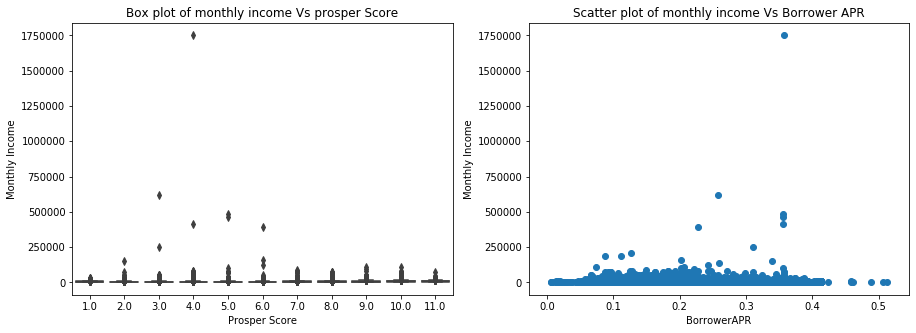

In [35]:
# Stated MonthlyIncome vs Prosper Rating
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=df_loan,x='ProsperScore',y='StatedMonthlyIncome',color=base_color);
plt.xlabel('Prosper Score');
plt.ylabel('Monthly Income');
plt.title('Box plot of monthly income Vs prosper Score');

plt.subplot(1, 2, 2)
plt.scatter(data=df_loan,x='BorrowerAPR',y='StatedMonthlyIncome',color=base_color);
plt.xlabel('BorrowerAPR');
plt.ylabel('Monthly Income');
plt.title('Scatter plot of monthly income Vs Borrower APR');

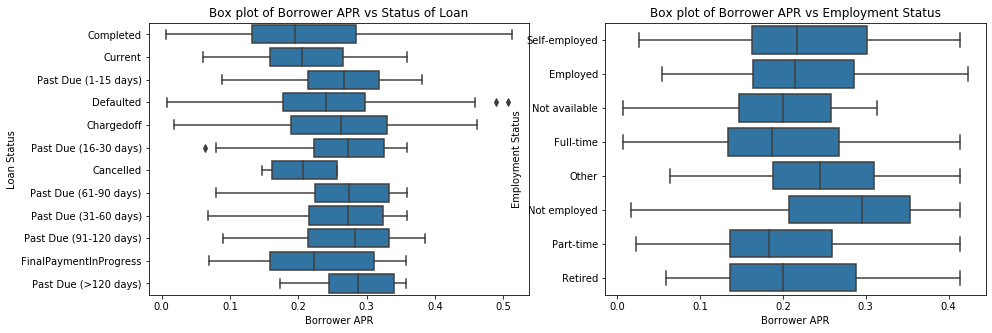

In [36]:
# Borrower APR vs Status of Loan and  Borrower APR vs Employment status
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=df_loan,x='BorrowerAPR',y='LoanStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('Box plot of Borrower APR vs Status of Loan');

plt.subplot(1, 2, 2)
sns.boxplot(data=df_loan,x='BorrowerAPR',y='EmploymentStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Employment Status');
plt.title('Box plot of Borrower APR vs Employment Status');

In [37]:
df_series = df_loan['BorrowerRate'].groupby(df_loan['LoanOriginationQuarter']).mean().reset_index()

In [38]:
df_series.LoanOriginationQuarter = pd.Categorical(df_series.LoanOriginationQuarter, sorted(df_series.LoanOriginationQuarter, key=lambda x: x.split(' ')[-1]), ordered = True)
df_series.sort_values('LoanOriginationQuarter', inplace=True)

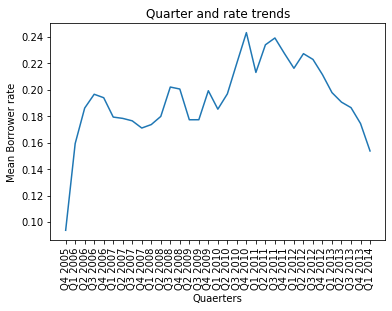

In [39]:
# Mean Borrower rate over time
plt.errorbar(data=df_series,x='LoanOriginationQuarter',y='BorrowerRate');
plt.xticks(rotation = 90);
plt.xlabel('Quaerters');
plt.ylabel('Mean Borrower rate');
plt.title('Quarter and rate trends');

## Multivariate Data Analysis

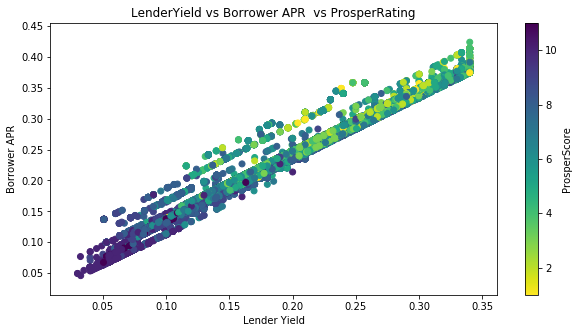

In [40]:
# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 5])
plt.scatter(data=df_loan,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR')
plt.title('LenderYield vs Borrower APR  vs ProsperRating');

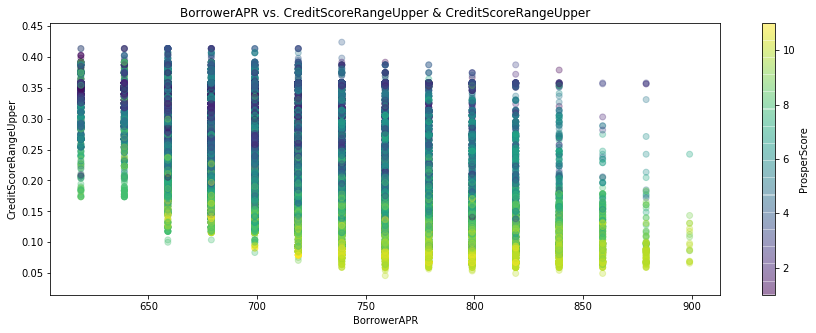

In [41]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
plt.scatter(data = df_loan, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

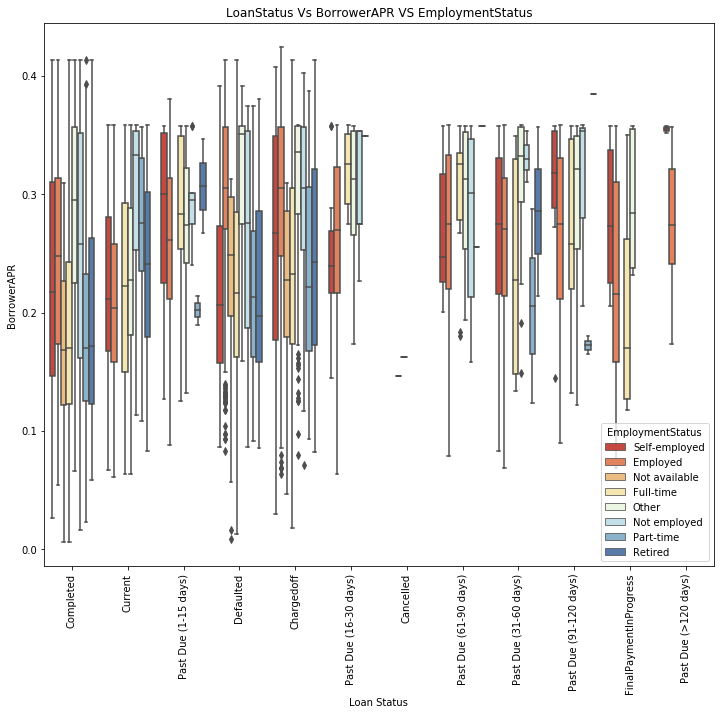

In [42]:
# LoanStatus Vs BorrowerAPR VS EmploymentStatus
plt.figure(figsize=[12,10])
sns.boxplot(x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", data=df_loan, palette="RdYlBu");
plt.xticks(rotation = 90);
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.title('LoanStatus Vs BorrowerAPR VS EmploymentStatus');

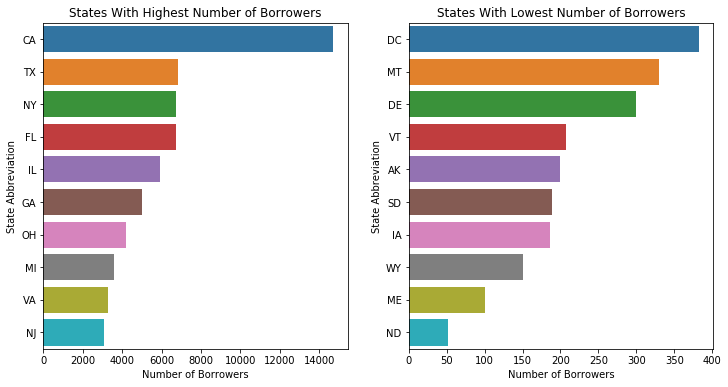

In [43]:
most_state_list = df_loan['BorrowerState'].value_counts()[:10].index.tolist()
most_state_count = df_loan['BorrowerState'].value_counts()[:10].values.tolist()

least_state_list = df_loan['BorrowerState'].value_counts()[-10:].index.tolist()
least_state_count = df_loan['BorrowerState'].value_counts()[-10:].values.tolist()

f,(ax1,ax2) = plt.subplots(ncols=2, sharey=False, sharex=False,
                          figsize=(12,6))

sns.barplot(x=most_state_count, y=most_state_list, ax=ax1)
ax1.set_title('States With Highest Number of Borrowers')
ax1.set_xlabel('Number of Borrowers')
ax1.set_ylabel('State Abbreviation')

sns.barplot(x=least_state_count, y=least_state_list, ax=ax2)
ax2.set_title('States With Lowest Number of Borrowers')
ax2.set_xlabel('Number of Borrowers')
ax2.set_ylabel('State Abbreviation')
plt.show()

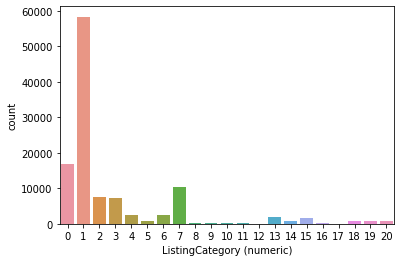

In [44]:
# fig = plt.figure(figsize=(12,6))
sns.countplot(df_loan["ListingCategory (numeric)"])

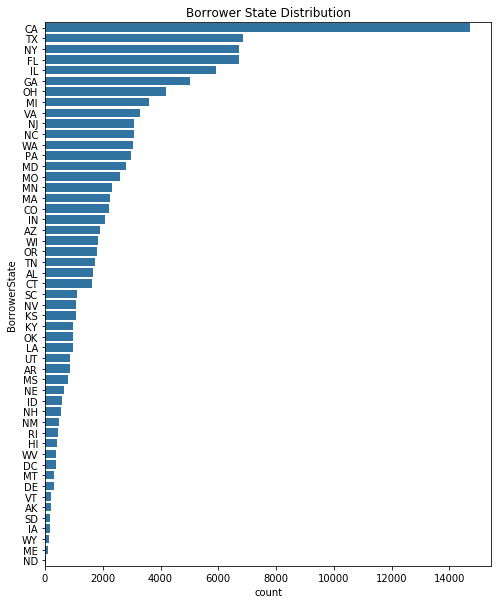

In [45]:
#Borrower State Distrobution
cat_order = df_loan.BorrowerState.value_counts().index
plt.figure(figsize=[8, 10])
sns.countplot(data=df_loan,y='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text xticklabel objects>)

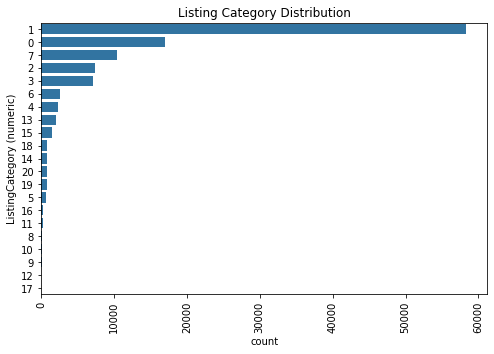

In [46]:
#Listing Category Distrobution
cat_order = df_loan["ListingCategory (numeric)"].value_counts().index
plt.figure(figsize=[8, 5])
sns.countplot(data=df_loan,y='ListingCategory (numeric)',color=base_color, order=cat_order);
plt.title('Listing Category Distribution')
plt.xticks(rotation=90)

# add annotations
# n_points = df_loan.shape[0]
# cat_counts = df_loan['ListingCategory (numeric)'].value_counts()
# locs, labels = plt.yticks() # get the current tick locations and labels

# # loop through each pair of locations and labels
# for loc, label in zip(locs, labels):

#     # get the text property for the label to get the correct count
#     count = cat_counts[label.get_text()]
#     pct_string = '{:0.0f}%'.format(100*count/n_points)

#     # print the annotation just below the top of the bar
#     plt.text(count+1400, loc+0.3,  pct_string, ha = 'center', color = 'black');

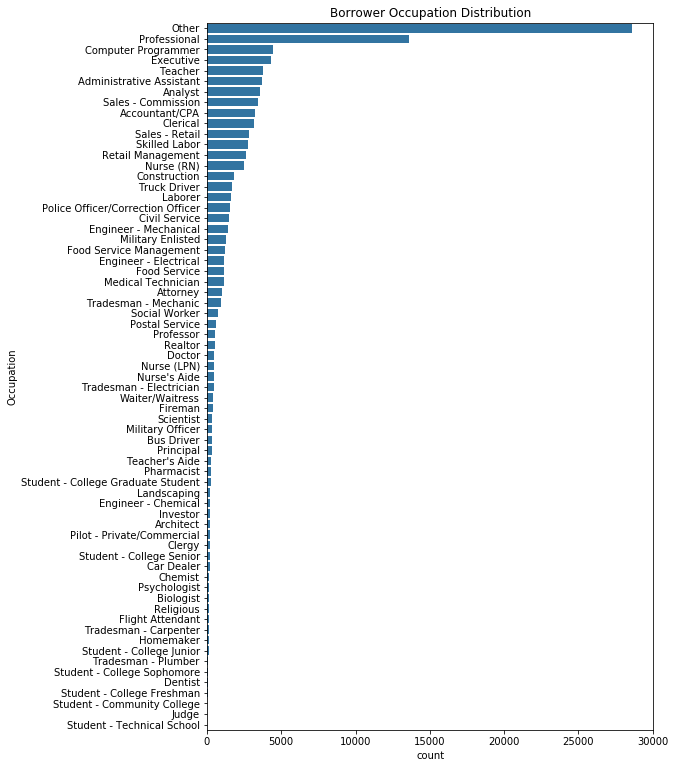

In [47]:
#Borrower Occupation Distrobution
cat_order = df_loan.Occupation.value_counts().index
plt.figure(figsize=[8, 13])
sns.countplot(data=df_loan,y='Occupation',color=base_color, order=cat_order);
plt.title('Borrower Occupation Distribution');

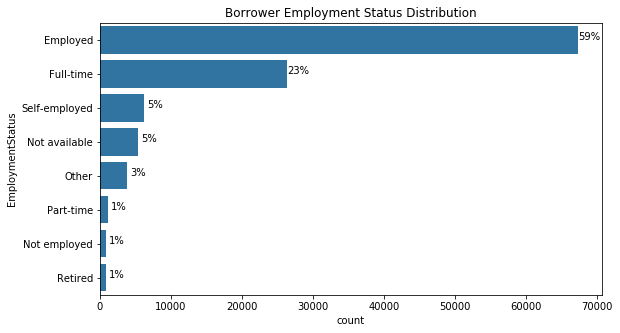

In [48]:
#Borrower Employment Status Distrobution
cat_order = df_loan.EmploymentStatus.value_counts().index
plt.figure(figsize=[9, 5])
sns.countplot(data=df_loan,y='EmploymentStatus',color=base_color, order=cat_order);
plt.title('Borrower Employment Status Distribution')

# add annotations
n_points = df_loan.shape[0]
cat_counts = df_loan['EmploymentStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1600, loc,  pct_string, ha = 'center', color = 'black');

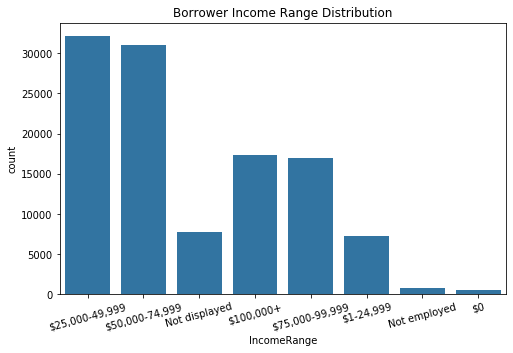

In [49]:
#Borrower Income Range Status Distrobution
plt.figure(figsize=[8, 5])
sns.countplot(data=df_loan,x='IncomeRange',color=base_color);
plt.title('Borrower Income Range Distribution')
plt.xticks(rotation=15);

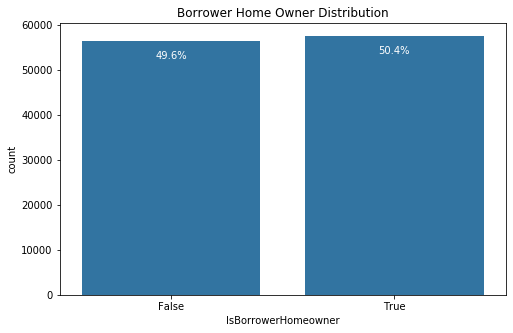

In [50]:
#Is Borrower-Homeowner Status Distrobution
plt.figure(figsize=[8, 5])

def str2bool(v):
    return str(v).lower() in ("yes", "true", "True", "1")

base_color = sns.color_palette()[0]
sns.countplot(data = df_loan, x = 'IsBorrowerHomeowner', color = base_color)

# add annotations
n_points = df_loan.shape[0]
cat_counts = df_loan['IsBorrowerHomeowner'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[str2bool(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-4000, pct_string, ha = 'center', color = 'w')

plt.title('Borrower Home Owner Distribution');

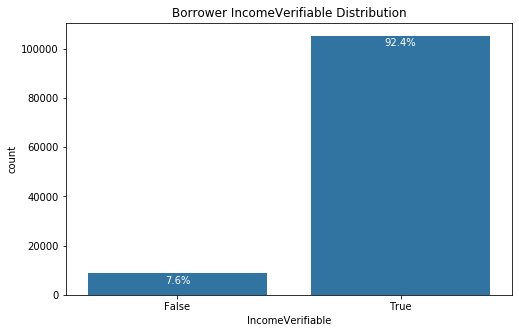

In [51]:
#Is Income-Verifiable Status Distrobution
plt.figure(figsize=[8, 5])

def str2bool(v):
    return str(v).lower() in ("yes", "true", "True", "1")

base_color = sns.color_palette()[0]
sns.countplot(data = df_loan, x = 'IncomeVerifiable', color = base_color)

# add annotations
n_points = df_loan.shape[0]
cat_counts = df_loan['IncomeVerifiable'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[str2bool(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-4000, pct_string, ha = 'center', color = 'w')

#sb.countplot(data=df_loans_clean,x='IsBorrowerHomeowner',color=base_color);
plt.title('Borrower IncomeVerifiable Distribution');

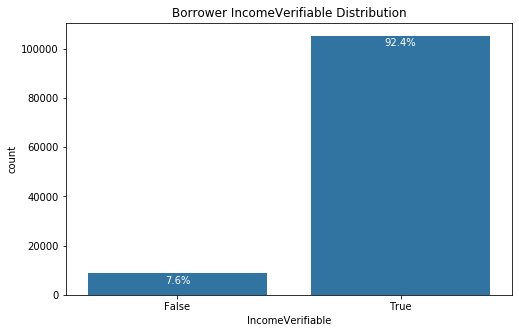

In [52]:
#Is Income-Verifiable Status Distrobution
plt.figure(figsize=[8, 5])

def str2bool(v):
    return str(v).lower() in ("yes", "true", "True", "1")

base_color = sns.color_palette()[0]
sns.countplot(data = df_loan, x = 'IncomeVerifiable', color = base_color)

# add annotations
n_points = df_loan.shape[0]
cat_counts = df_loan['IncomeVerifiable'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[str2bool(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-4000, pct_string, ha = 'center', color = 'w')

#sb.countplot(data=df_loans_clean,x='IsBorrowerHomeowner',color=base_color);
plt.title('Borrower IncomeVerifiable Distribution');

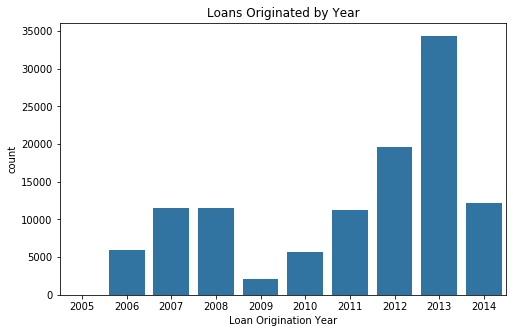

In [53]:
# Loan Origination by Year
plt.figure(figsize=[8, 5])
sns.countplot(data=df_loan,x=df_loan['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

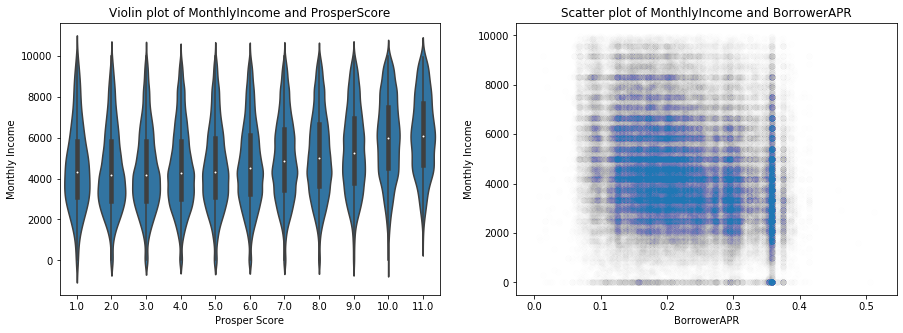

In [54]:
# Stated MonthlyIncome  Prosper Rating
# Since 75% of the data has StatedMonthlyIncome less than 6825, we can plot data within this range
df_wo_outlier=df_loan[df_loan['StatedMonthlyIncome'] < 10000]

plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sns.violinplot(data=df_wo_outlier,x='ProsperScore', y='StatedMonthlyIncome',color=base_color);
plt.xlabel('Prosper Score');
plt.ylabel('Monthly Income');
plt.title('Violin plot of MonthlyIncome and ProsperScore');

plt.subplot(1, 2, 2)
plt.scatter(data=df_wo_outlier,x='BorrowerAPR', y='StatedMonthlyIncome',color=base_color, alpha =  0.005);
plt.xlabel('BorrowerAPR');
plt.ylabel('Monthly Income');
plt.title('Scatter plot of MonthlyIncome and BorrowerAPR');

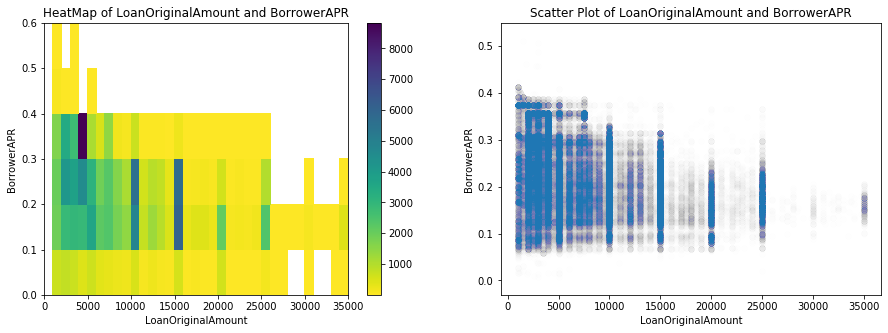

In [55]:
# Checking the relation between ProsperScore and StatedMonthlyIncome

plt.figure(figsize = [15, 5]) 


plt.subplot(1, 2, 1)
bins_x = np.arange(0, df_loan['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(0, df_loan['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR')
plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR')

plt.colorbar()


plt.subplot(1, 2, 2)
plt.scatter(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.005)
plt.yticks(np.arange(0, 0.6, 0.1))
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

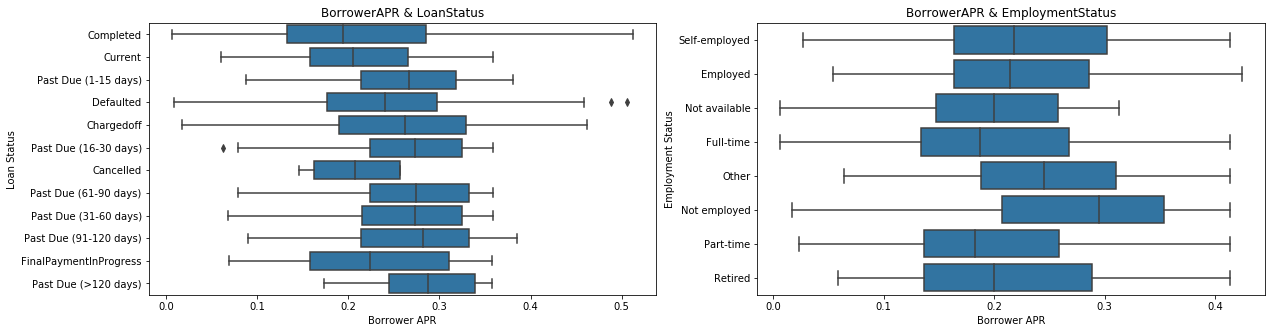

In [56]:
# Borrower APR vs Status of Loan and  Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=df_loan,x='BorrowerAPR',y='LoanStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('BorrowerAPR & LoanStatus');

plt.subplot(1, 2, 2)
sns.boxplot(data=df_loan,x='BorrowerAPR',y='EmploymentStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Employment Status');
plt.title('BorrowerAPR & EmploymentStatus');

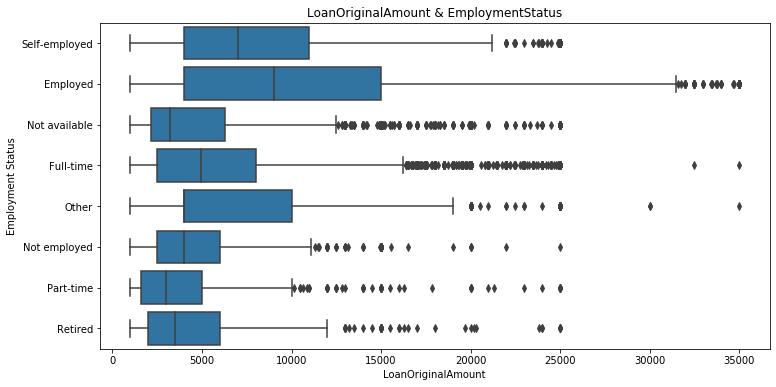

In [57]:
plt.figure(figsize = [12, 6])
sns.boxplot(data=df_loan,x='LoanOriginalAmount',y='EmploymentStatus',color=base_color);
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Employment Status');
plt.title('LoanOriginalAmount & EmploymentStatus');

Text(0.5, 1.0, 'Prosper Rating Distribution for Employment Status')

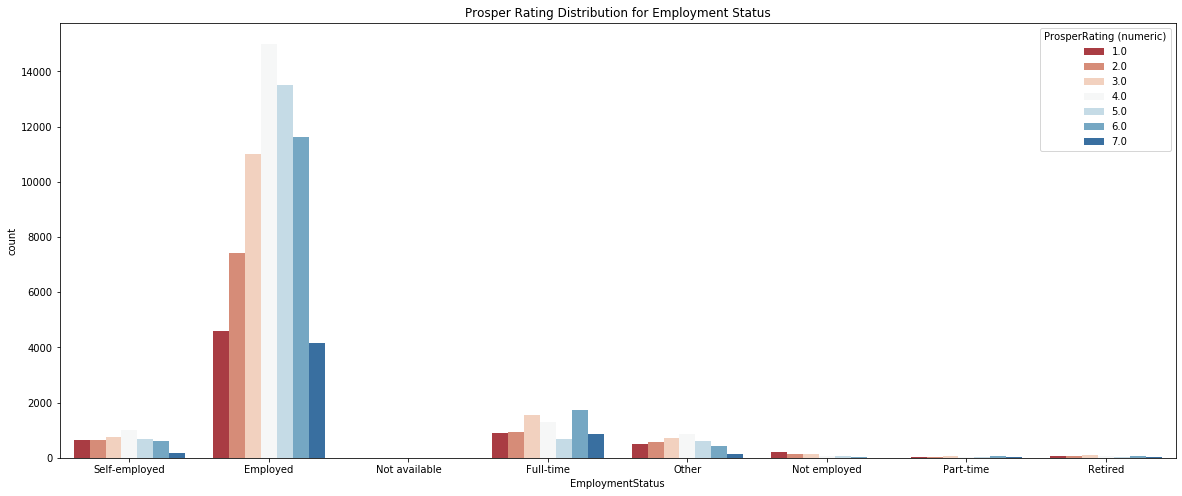

In [58]:
plt.figure(figsize = [20, 8])
sns.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'ProsperRating (numeric)', palette='RdBu')
plt.title('Prosper Rating Distribution for Employment Status')

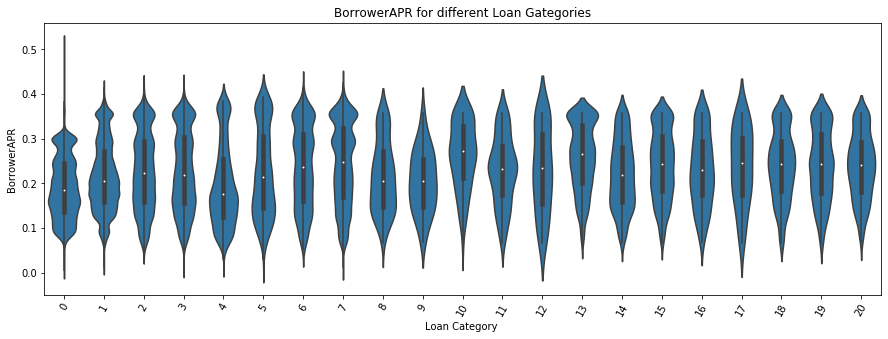

In [59]:
plt.figure(figsize = [15, 5])
sns.violinplot(data=df_loan,x='ListingCategory (numeric)', y='BorrowerAPR',color=base_color);
plt.xlabel('Loan Category ');
plt.ylabel('BorrowerAPR');
plt.title('BorrowerAPR for different Loan Gategories')
plt.xticks(rotation=60);

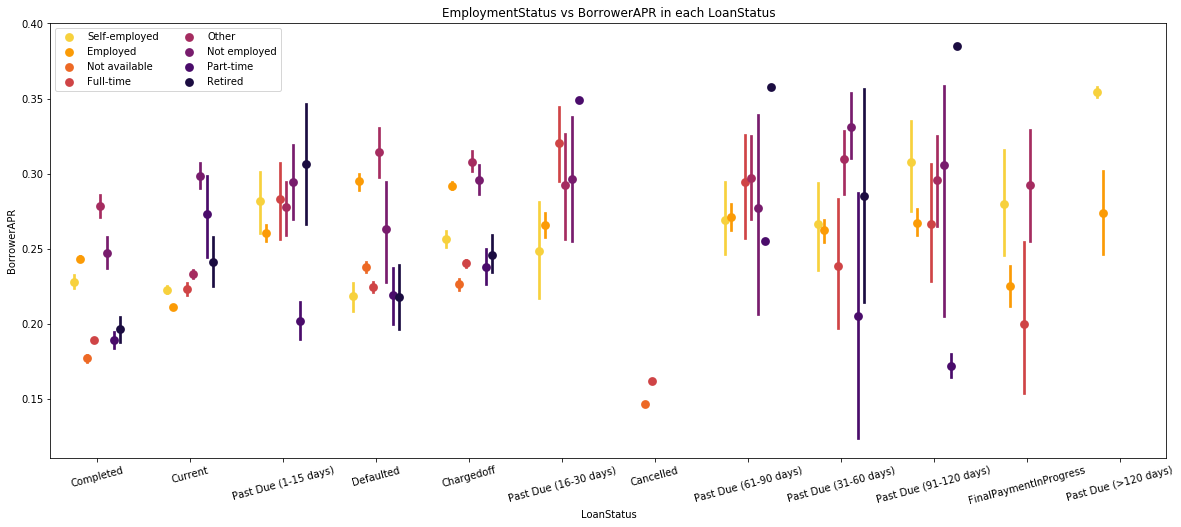

In [60]:
fig = plt.figure(figsize = [20,8])
ax = sns.pointplot(data = df_loan, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

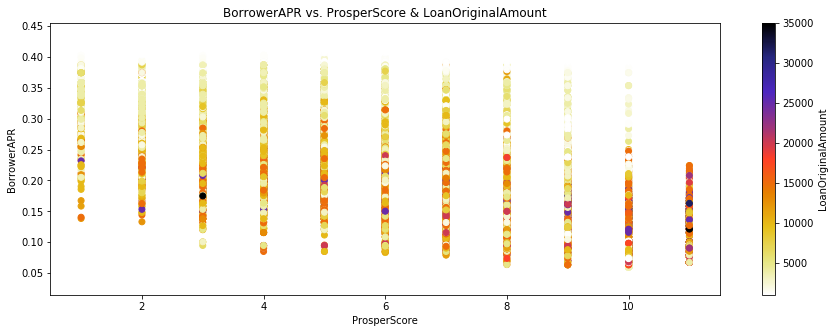

In [61]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data = df_loan[df_loan['StatedMonthlyIncome'] <20000],\
            x = 'ProsperScore', y = 'BorrowerAPR', c ='LoanOriginalAmount', cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore & LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

## Data Preprocessing

In [62]:
df['Term'] = df['Term'].astype('object')
df['ProsperScore'] = df['ProsperScore'].astype('object')

In [63]:
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df["no_ofmissing_values"]=df.isnull().sum()

In [64]:
missing_value_df.sort_values(by = 'percent_missing', ascending = False)[0:30]

column_name  \
GroupKey                                                        GroupKey   
LoanFirstDefaultedCycleNumber              LoanFirstDefaultedCycleNumber   
ScorexChangeAtTimeOfListing                  ScorexChangeAtTimeOfListing   
ProsperPrincipalOutstanding                  ProsperPrincipalOutstanding   
ProsperPrincipalBorrowed                        ProsperPrincipalBorrowed   
ProsperPaymentsOneMonthPlusLate          ProsperPaymentsOneMonthPlusLate   
ProsperPaymentsLessThanOneMonthLate  ProsperPaymentsLessThanOneMonthLate   
OnTimeProsperPayments                              OnTimeProsperPayments   
TotalProsperLoans                                      TotalProsperLoans   
TotalProsperPaymentsBilled                    TotalProsperPaymentsBilled   
CreditGrade                                                  CreditGrade   
ClosedDate                                                    ClosedDate   
ProsperRating (Alpha)                              ProsperRating (Alpha)   
ProsperScore                                                ProsperScore   
EstimatedReturn                                          EstimatedReturn   
ProsperRating (numeric)                          ProsperRating (numeric)   
EstimatedLoss                                              EstimatedLoss   
EstimatedEffectiveYield                          EstimatedEffectiveYield   
DebtToIncomeRatio                                      DebtToIncomeRatio   
EmploymentStatusDuration                        EmploymentStatusDuration   
AmountDelinquent                                        AmountDelinquent   
CurrentCreditLines                                    CurrentCreditLines   
BankcardUtilization                                  BankcardUtilization   
PublicRecordsLast12Months                      PublicRecordsLast12Months   
OpenCreditLines                                          OpenCreditLines   
RevolvingCreditBalance                            RevolvingCreditBalance   
TotalTrades                                                  TotalTrades   
TradesOpenedLast6Months                          TradesOpenedLast6Months   
TradesNeverDelinquent (percentage)    TradesNeverDelinquent (percentage)   
AvailableBankcardCredit                          AvailableBankcardCredit   

                                     percent_missing  no_ofmissing_values  
GroupKey                                       88.29               100596  
LoanFirstDefaultedCycleNumber                  85.12                96985  
ScorexChangeAtTimeOfListing                    83.39                95009  
ProsperPrincipalOutstanding                    80.62                91852  
ProsperPrincipalBorrowed                       80.62                91852  
ProsperPaymentsOneMonthPlusLate                80.62                91852  
ProsperPaymentsLessThanOneMonthLate            80.62                91852  
OnTimeProsperPayments                          80.62                91852  
TotalProsperLoans                              80.62                91852  
TotalProsperPaymentsBilled                     80.62                91852  
CreditGrade                                    74.59                84984  
ClosedDate                                     51.65                58848  
ProsperRating (Alpha)                          25.53                29084  
ProsperScore                                   25.53                29084  
EstimatedReturn                                25.53                29084  
ProsperRating (numeric)                        25.53                29084  
EstimatedLoss                                  25.53                29084  
EstimatedEffectiveYield                        25.53                29084  
DebtToIncomeRatio                               7.51                 8554  
EmploymentStatusDuration                        6.69                 7625  
AmountDelinquent                                6.69                 7622  
CurrentCreditLines              

In [65]:
df=df.drop(["ListingKey",'ListingNumber','ListingCreationDate','ClosedDate',"ProsperRating (Alpha)",'GroupKey','CurrentlyInGroup','DateCreditPulled','LoanKey','LoanNumber','LoanOriginationDate','MemberKey','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments','PercentFunded','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','FirstRecordedCreditLine','LoanOriginationQuarter', 'BorrowerState'],axis=1)

In [66]:
df.shape

(113937, 58)

### Categorizing Target Variable

In [67]:
df["LoanStatus"].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [68]:
df['LoanStatus'] = df['LoanStatus'].replace(['Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)',
                                             'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)',
                                             'Past Due (>120 days)'],'Defaulted')
df['LoanStatus'] = df['LoanStatus'].replace('FinalPaymentInProgress','Completed')
print(df.LoanStatus.value_counts())

Current      56576
Completed    38279
Defaulted    19077
Cancelled        5
Name: LoanStatus, dtype: int64


In [69]:
df = df.drop(df[df['LoanStatus'] == 'Cancelled'].index)

In [70]:
df = df.reset_index()

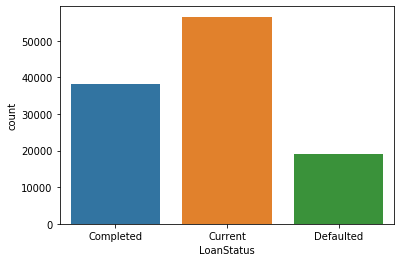

In [72]:
sns.countplot(df['LoanStatus']);

### Dropping Missing Values

In [73]:
df=df.dropna(thresh=df.shape[0]*0.5,how="all",axis=1)

In [74]:
df.shape

(113932, 49)

In [75]:
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
bool_columns=df.select_dtypes(include=['bool']).columns.tolist()

### Filling Missing Values

In [76]:
for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean())

In [77]:
df.isnull().sum().sum()

0

In [78]:
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df["no_of_missing_values"]=df.isnull().sum()

In [79]:
missing_value_df[:20]

column_name  percent_missing  \
index                                          index              0.0   
Term                                            Term              0.0   
LoanStatus                                LoanStatus              0.0   
BorrowerAPR                              BorrowerAPR              0.0   
BorrowerRate                            BorrowerRate              0.0   
LenderYield                              LenderYield              0.0   
EstimatedEffectiveYield      EstimatedEffectiveYield              0.0   
EstimatedLoss                          EstimatedLoss              0.0   
EstimatedReturn                      EstimatedReturn              0.0   
ProsperRating (numeric)      ProsperRating (numeric)              0.0   
ProsperScore                            ProsperScore              0.0   
ListingCategory (numeric)  ListingCategory (numeric)              0.0   
Occupation                                Occupation              0.0   
EmploymentStatus                    EmploymentStatus              0.0   
EmploymentStatusDuration    EmploymentStatusDuration              0.0   
IsBorrowerHomeowner              IsBorrowerHomeowner              0.0   
CreditScoreRangeLower          CreditScoreRangeLower              0.0   
CreditScoreRangeUpper          CreditScoreRangeUpper              0.0   
CurrentCreditLines                CurrentCreditLines              0.0   
OpenCreditLines                      OpenCreditLines              0.0   

                           no_of_missing_values  
index                                         0  
Term                                          0  
LoanStatus                                    0  
BorrowerAPR                                   0  
BorrowerRate                                  0  
LenderYield                                   0  
EstimatedEffectiveYield                       0  
EstimatedLoss                                 0  
EstimatedReturn                               0  
ProsperRating (numeric)                       0  
ProsperScore                                  0  
ListingCategory (numeric)                     0  
Occupation                                    0  
EmploymentStatus                              0  
EmploymentStatusDuration                      0  
IsBorrowerHomeowner                           0  
CreditScoreRangeLower                         0  
CreditScoreRangeUpper                         0  
CurrentCreditLines                            0  
OpenCreditLines                               0

In [80]:
cat_col=df[cateogry_columns].copy()

In [81]:
cat_col.head()

Term LoanStatus  ProsperScore     Occupation EmploymentStatus  \
0   36  Completed           4.0          Other    Self-employed   
1   36    Current           7.0   Professional         Employed   
2   36  Completed           4.0          Other    Not available   
3   36    Current           9.0  Skilled Labor         Employed   
4   36    Current           4.0      Executive         Employed   

      IncomeRange  
0  $25,000-49,999  
1  $50,000-74,999  
2   Not displayed  
3  $25,000-49,999  
4       $100,000+

In [82]:
final_cat_col=cat_col[['Term','ProsperScore','LoanStatus','Occupation','EmploymentStatus','IncomeRange']]

In [83]:
final_cat_col.head()

Term  ProsperScore LoanStatus     Occupation EmploymentStatus  \
0   36           4.0  Completed          Other    Self-employed   
1   36           7.0    Current   Professional         Employed   
2   36           4.0  Completed          Other    Not available   
3   36           9.0    Current  Skilled Labor         Employed   
4   36           4.0    Current      Executive         Employed   

      IncomeRange  
0  $25,000-49,999  
1  $50,000-74,999  
2   Not displayed  
3  $25,000-49,999  
4       $100,000+

In [84]:
df['LoanStatus'].value_counts()

Current      56576
Completed    38279
Defaulted    19077
Name: LoanStatus, dtype: int64

In [85]:
df["Occupation"].value_counts()

Other                          32201
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [86]:
df["EmploymentStatus"].value_counts()

Employed         69574
Full-time        26354
Self-employed     6134
Not available     5346
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [87]:
df['IncomeRange'].value_counts()

$25,000-49,999    32191
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7737
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [88]:
def ordinal_encoder(final_cat_col, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(final_cat_col[feat].nunique()))
        feat_key = list(final_cat_col[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        final_cat_col[feat] = final_cat_col[feat].map(feat_dict)
    return final_cat_col

final_cat_col = ordinal_encoder(final_cat_col, final_cat_col.drop(['LoanStatus'],axis=1).columns)
final_cat_col.shape

(113932, 6)

In [89]:
final_cat_col.head()

Term  ProsperScore LoanStatus  Occupation  EmploymentStatus  IncomeRange
0     2             4  Completed          36                 8            4
1     2             7    Current          42                 1            5
2     2             4  Completed          36                 3            7
3     2             9    Current          51                 1            4
4     2             4    Current          20                 1            3

In [90]:
df=df.drop(['LoanStatus','Occupation','EmploymentStatus','IncomeRange','Term','ProsperScore'],axis=1)

In [91]:
df=pd.concat([df,final_cat_col],axis=1)

In [92]:
df.head()

index  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0      0      0.16516        0.1580       0.1380                 0.168661   
1      1      0.12016        0.0920       0.0820                 0.079600   
2      2      0.28269        0.2750       0.2400                 0.168661   
3      3      0.12528        0.0974       0.0874                 0.084900   
4      4      0.24614        0.2085       0.1985                 0.183160   

   EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
0       0.080306         0.096068                 4.072243   
1       0.024900         0.054700                 6.000000   
2       0.080306         0.096068                 4.072243   
3       0.024900         0.060000                 6.000000   
4       0.092500         0.090660                 3.000000   

   ListingCategory (numeric)  EmploymentStatusDuration  IsBorrowerHomeowner  \
0                          0                  2.000000                 True   
1                          2                 44.000000                False   
2                          0                 96.072203                False   
3                         16                113.000000                 True   
4                          2                 44.000000                 True   

   CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  \
0                  640.0                  659.0            5.000000   
1                  680.0                  699.0           14.000000   
2                  480.0                  499.0           10.317205   
3                  800.0                  819.0            5.000000   
4                  680.0                  699.0           19.000000   

   OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0         4.000000                        12.0                      1   
1        14.000000                        29.0                     13   
2         9.260185                         3.0                      0   
3         5.000000                        29.0                      7   
4        19.000000                        49.0                      6   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                         24.0                   3.0             3.0   
1                        389.0                   3.0             5.0   
2                          0.0                   0.0             1.0   
3                        115.0                   0.0             1.0   
4                        220.0                   1.0             9.0   

   CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0                   2.0         472.00000                      4.0   
1                   0.0           0.00000                      0.0   
2                   1.0         984.51632                      0.0   
3                   4.0       10056.00000                     14.0   
4                   0.0           0.00000                      0.0   

   PublicRecordsLast10Years  PublicRecordsLast12Months  \
0                       0.0                   0.000000   
1                       1.0                   0.000000   
2                       0.0                   0.015094   
3                       0.0                   0.000000   
4                       0.0                   0.000000   

   RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
0                0.000000             0.000000              1500.000000   
1             3989.000000             0.210000             10266.000000   
2            17598.865807             0.561313             11210.222724   
3             1444.000000             0.040000             30754.000000   
4             6193.000000             0.810000               695.000000   

   TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
0    11.000000                              0.8100                 0.000000   
1    29.000000

In [93]:
df.shape

(113932, 49)

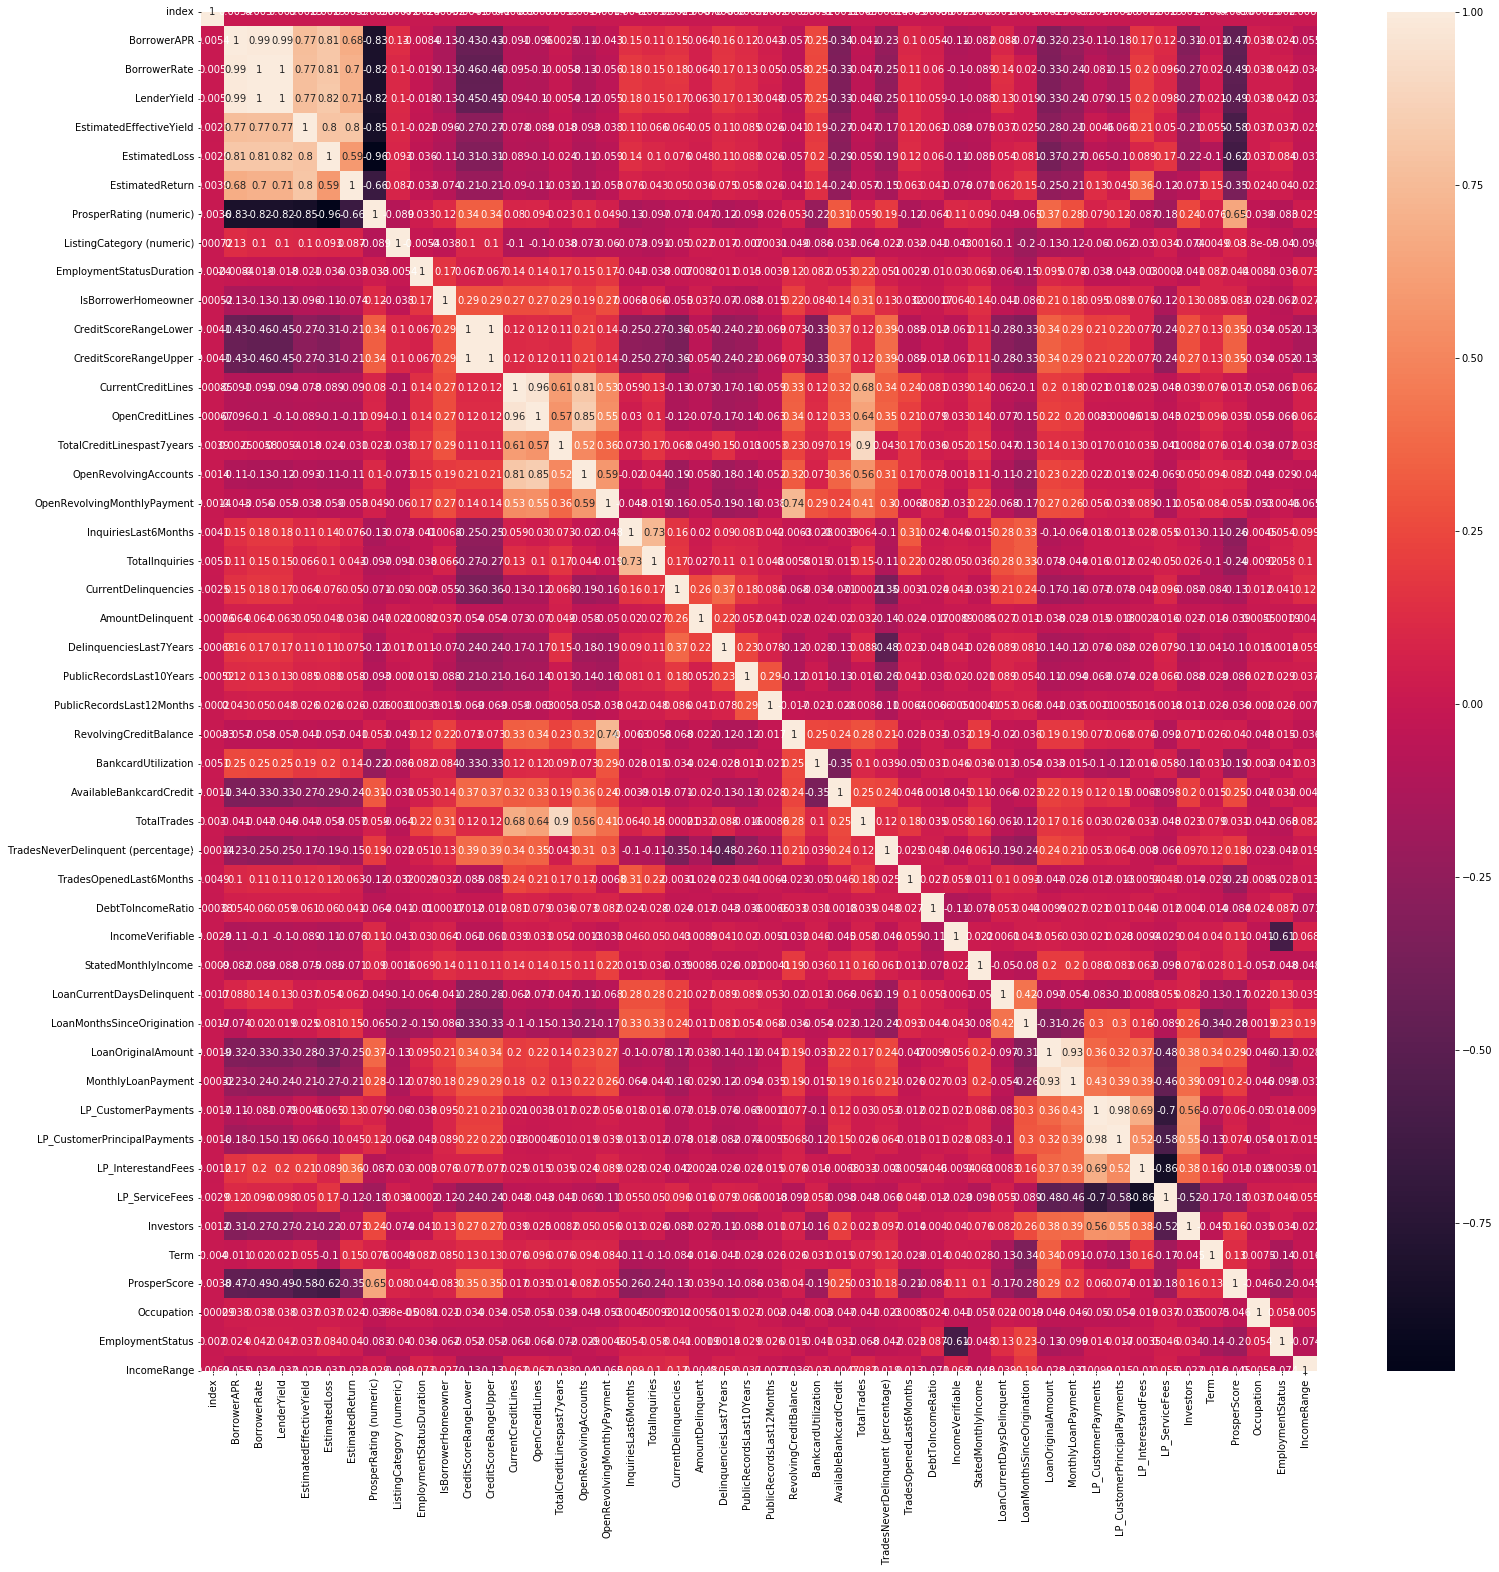

In [94]:
plt.figure(figsize = (25, 25))
sns.heatmap(df.corr(), annot = True)
plt.show()

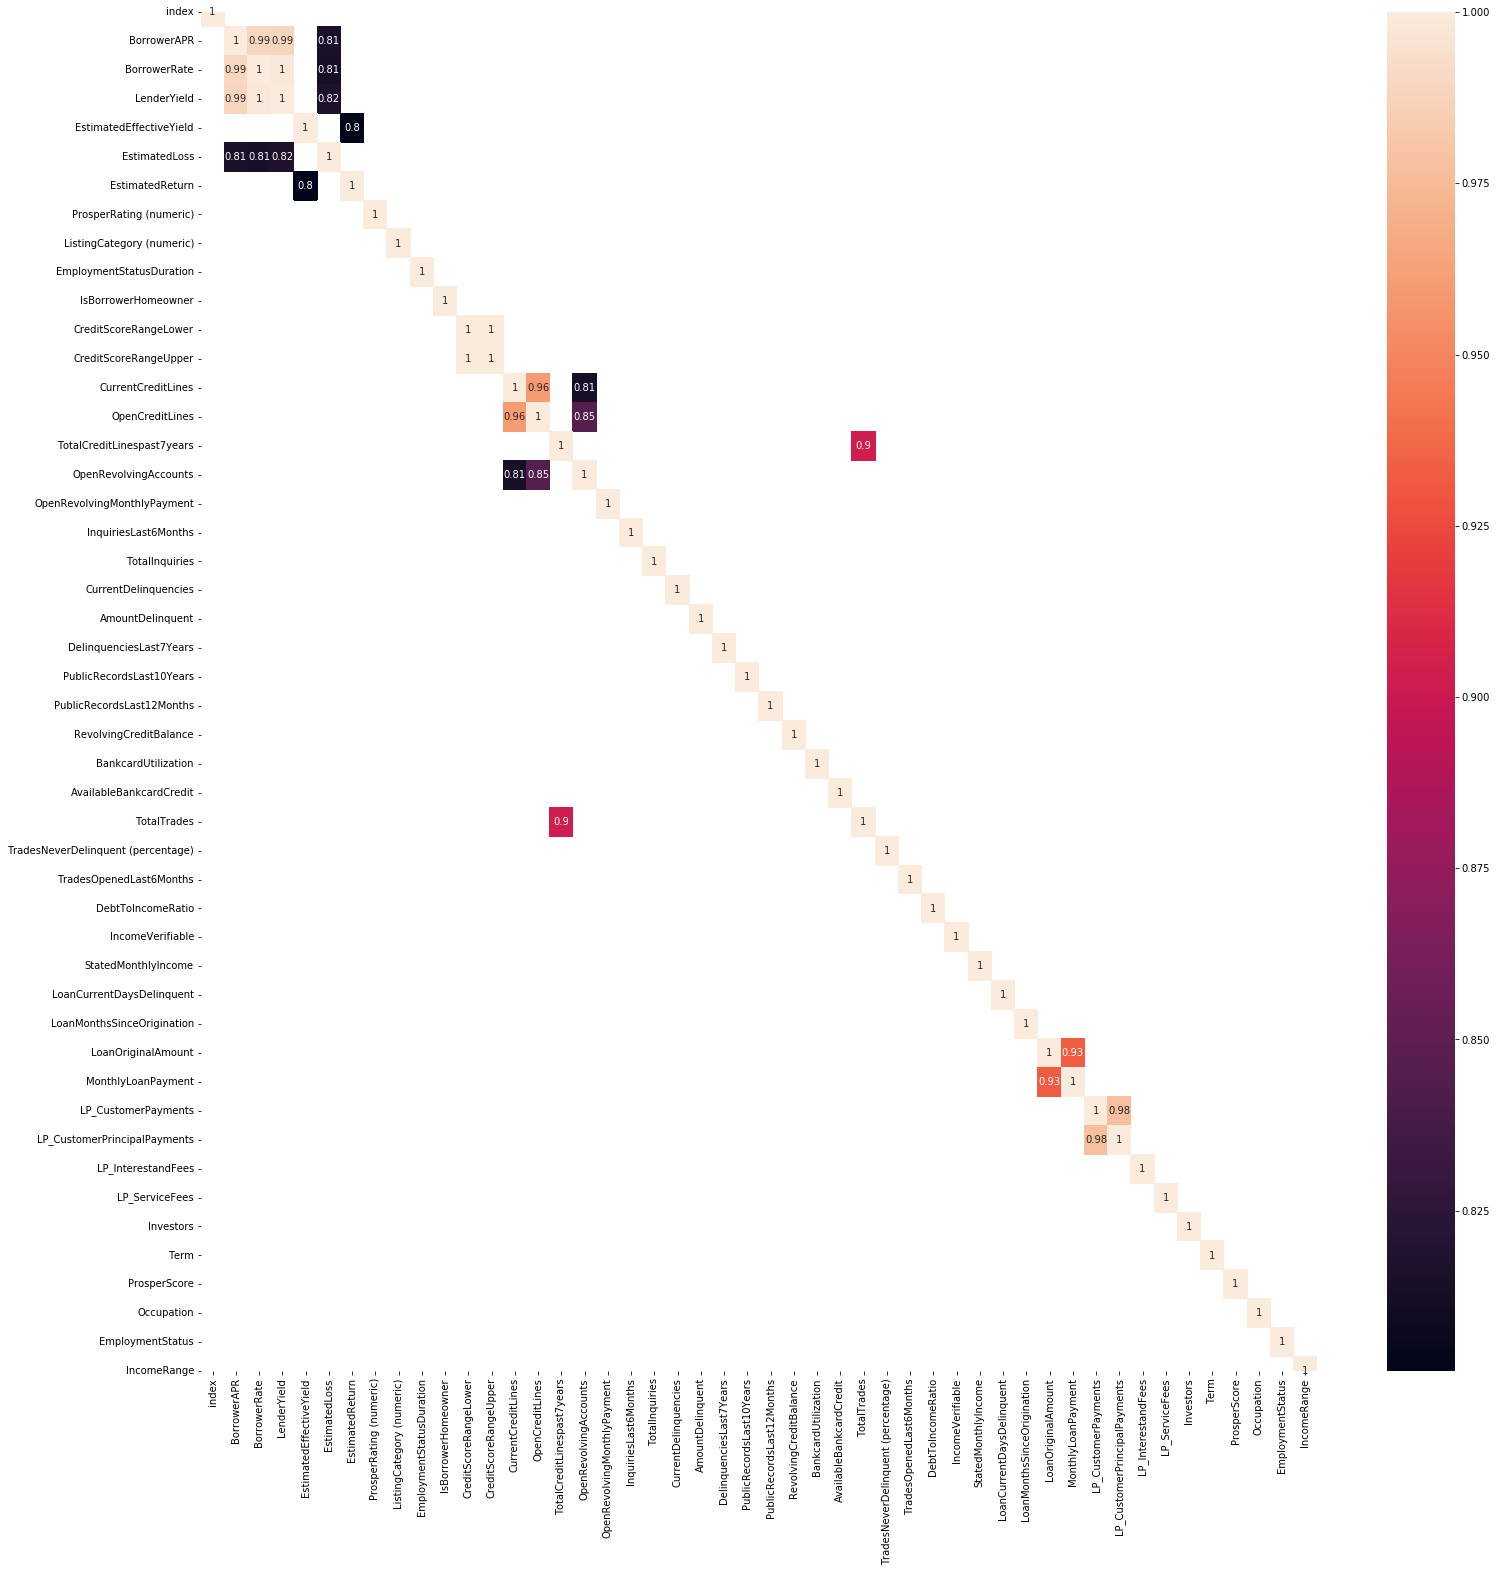

In [95]:
plt.figure(figsize = (25, 25))
sns.heatmap(df.corr()[df.corr() > 0.8], annot = True)
plt.show()

In [96]:
df = df.drop(['BorrowerAPR', 'LenderYield', 'EstimatedLoss', 'CreditScoreRangeLower', 'OpenCreditLines',
              'OpenRevolvingAccounts', 'TotalCreditLinespast7years', 'LP_CustomerPrincipalPayments',
              'LoanMonthsSinceOrigination'], axis = 1)

In [97]:
df.shape

(113932, 40)

In [98]:
from sklearn.model_selection import train_test_split
X= df.drop(['LoanStatus'], axis=1)
y = df['LoanStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (79752, 39)
X_test : (34180, 39)
y_train : (79752,)
y_test : (34180,)


In [99]:
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier

In [100]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'dtf' in kwargs.keys() and kwargs['dtf']:
        dtf=DecisionTreeClassifier()
        dtf.fit(X_train,y_train)
        y_pred = dtf.predict(X_test)
        scores['dtf'] = [accuracy_score(y_test, y_pred)]
#         scores['extree']['roc_auc'] = roc_auc_score(y_test, y_pred)
    return scores

In [101]:
modelling(X_train,y_train, X_test, y_test, dtf=True)

{'dtf': [0.9811878291398478]}

In [102]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import plotly.express as px
import plotly.offline as py
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Rainbow', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [103]:
dtf=DecisionTreeClassifier()
dtf.fit(X_train,y_train)
# dtf.score(X_test,y_test)
y_pred = dtf.predict(X_test)

In [104]:
model_performance(dtf,y_test, y_pred)

C:\Users\Owner\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [105]:
 print('Train accuracy: ', dtf.score(X_train, y_train))

Train accuracy:  1.0


In [106]:
 print('Test accuracy: ', dtf.score(X_test, y_test))

Test accuracy:  0.9810415447630193


In [107]:
y_pred=dtf.predict(X_train)

In [108]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

   Completed       1.00      1.00      1.00     26810
     Current       1.00      1.00      1.00     39556
   Defaulted       1.00      1.00      1.00     13386

    accuracy                           1.00     79752
   macro avg       1.00      1.00      1.00     79752
weighted avg       1.00      1.00      1.00     79752



In [109]:
y_pred=dtf.predict(X_test)

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Completed       0.97      0.97      0.97     11469
     Current       0.98      0.98      0.98     17020
   Defaulted       1.00      1.00      1.00      5691

    accuracy                           0.98     34180
   macro avg       0.98      0.98      0.98     34180
weighted avg       0.98      0.98      0.98     34180



In [112]:
from sklearn.model_selection import GridSearchCV

tuned_parms = {'criterion' : ['entropy', 'gini'],
              'max_depth' : range(2, 10),
              'min_samples_split' : range(5, 10, 15)}
dtf = DecisionTreeClassifier(random_state = 10)
grid = GridSearchCV(estimator = dtf, param_grid = tuned_parms, cv = 5, scoring = 'roc_auc')
grid_model = grid.fit(X_train, y_train)

In [113]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 5}

In [114]:
dt_best = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, min_samples_split = 2)
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [115]:
y_test_pred = dt_best.predict(X_test)

model_performance(dt_best, y_test, y_test_pred)

C:\Users\Owner\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [116]:
feat_imp=pd.DataFrame(dt_best.feature_importances_,index=X_train.columns,columns=['Importance'])
feat_imp=feat_imp.reset_index().sort_values('Importance',ascending=False)

In [117]:
feat_imp

index  Importance
27           LoanCurrentDaysDelinquent    0.796333
30                 LP_CustomerPayments    0.203667
29                  MonthlyLoanPayment    0.000000
22  TradesNeverDelinquent (percentage)    0.000000
23             TradesOpenedLast6Months    0.000000
24                   DebtToIncomeRatio    0.000000
25                    IncomeVerifiable    0.000000
26                 StatedMonthlyIncome    0.000000
28                  LoanOriginalAmount    0.000000
0                                index    0.000000
20             AvailableBankcardCredit    0.000000
31                  LP_InterestandFees    0.000000
32                      LP_ServiceFees    0.000000
33                           Investors    0.000000
34                                Term    0.000000
35                        ProsperScore    0.000000
36                          Occupation    0.000000
37                    EmploymentStatus    0.000000
21                         TotalTrades    0.000000
19                 BankcardUtilization    0.000000
1                         BorrowerRate    0.000000
9                   CurrentCreditLines    0.000000
2              EstimatedEffectiveYield    0.000000
3                      EstimatedReturn    0.000000
4              ProsperRating (numeric)    0.000000
5            ListingCategory (numeric)    0.000000
6             EmploymentStatusDuration    0.000000
7                  IsBorrowerHomeowner    0.000000
8                CreditScoreRangeUpper    0.000000
10         OpenRevolvingMonthlyPayment    0.000000
18              RevolvingCreditBalance    0.000000
11                InquiriesLast6Months    0.000000
12                      TotalInquiries    0.000000
13                CurrentDelinquencies    0.000000
14                    AmountDelinquent    0.000000
15             DelinquenciesLast7Years    0.000000
16            PublicRecordsLast10Years    0.000000
17           PublicRecordsLast12Months    0.000000
38                         IncomeRange    0.000000

In [118]:
y_xgb = y.replace({'Completed' : 0, 'Current' : 1, 'Defaulted' : 2})

In [119]:
X_train, X_test, y_xgb_train, y_xgb_test = train_test_split(X, y_xgb, test_size = 0.3, random_state = 10)

print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_xgb_train :', y_xgb_train.shape)
print('y_xgb_test :', y_xgb_test.shape)

X_train : (79752, 39)
X_test : (34180, 39)
y_xgb_train : (79752,)
y_xgb_test : (34180,)


In [120]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
#         scores['xgb']['roc_auc'] = roc_auc_score(y_test, y_pred)
    return scores

In [121]:
modelling(X_train, y_xgb_train, X_test, y_xgb_test, xgb=True)

[19:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'xgb': [0.9935634874195436]}

In [122]:
xgb = XGBClassifier()
xgb.fit(X_train._get_numeric_data(), np.ravel(y_xgb_train, order='C'))
y_xgb_pred_test = xgb.predict(X_test)
y_xgb_pred_train = xgb.predict(X_train)

[19:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [123]:
print(classification_report(y_xgb_test, y_xgb_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11363
           1       1.00      0.99      0.99     17069
           2       1.00      1.00      1.00      5748

    accuracy                           0.99     34180
   macro avg       0.99      1.00      0.99     34180
weighted avg       0.99      0.99      0.99     34180



In [124]:
print(classification_report(y_xgb_train,y_xgb_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26916
           1       1.00      1.00      1.00     39507
           2       1.00      1.00      1.00     13329

    accuracy                           1.00     79752
   macro avg       1.00      1.00      1.00     79752
weighted avg       1.00      1.00      1.00     79752



In [125]:
feat_imp=pd.DataFrame(xgb.feature_importances_,index=X_train.columns,columns=['Importance'])
feat_imp=feat_imp.reset_index().sort_values('Importance',ascending=False)

In [126]:
feat_imp

index  Importance
27           LoanCurrentDaysDelinquent    0.453034
37                    EmploymentStatus    0.364620
28                  LoanOriginalAmount    0.043328
30                 LP_CustomerPayments    0.031854
32                      LP_ServiceFees    0.027439
2              EstimatedEffectiveYield    0.014475
4              ProsperRating (numeric)    0.014210
5            ListingCategory (numeric)    0.012160
34                                Term    0.007198
29                  MonthlyLoanPayment    0.006741
31                  LP_InterestandFees    0.003451
3                      EstimatedReturn    0.002802
33                           Investors    0.002677
1                         BorrowerRate    0.001557
35                        ProsperScore    0.000870
16            PublicRecordsLast10Years    0.000802
18              RevolvingCreditBalance    0.000711
14                    AmountDelinquent    0.000709
38                         IncomeRange    0.000697
26                 StatedMonthlyIncome    0.000686
12                      TotalInquiries    0.000684
22  TradesNeverDelinquent (percentage)    0.000673
23             TradesOpenedLast6Months    0.000669
15             DelinquenciesLast7Years    0.000669
9                   CurrentCreditLines    0.000621
36                          Occupation    0.000615
24                   DebtToIncomeRatio    0.000613
20             AvailableBankcardCredit    0.000610
19                 BankcardUtilization    0.000600
0                                index    0.000595
10         OpenRevolvingMonthlyPayment    0.000592
11                InquiriesLast6Months    0.000562
6             EmploymentStatusDuration    0.000560
7                  IsBorrowerHomeowner    0.000506
8                CreditScoreRangeUpper    0.000501
21                         TotalTrades    0.000489
13                CurrentDelinquencies    0.000245
25                    IncomeVerifiable    0.000177
17           PublicRecordsLast12Months    0.000000

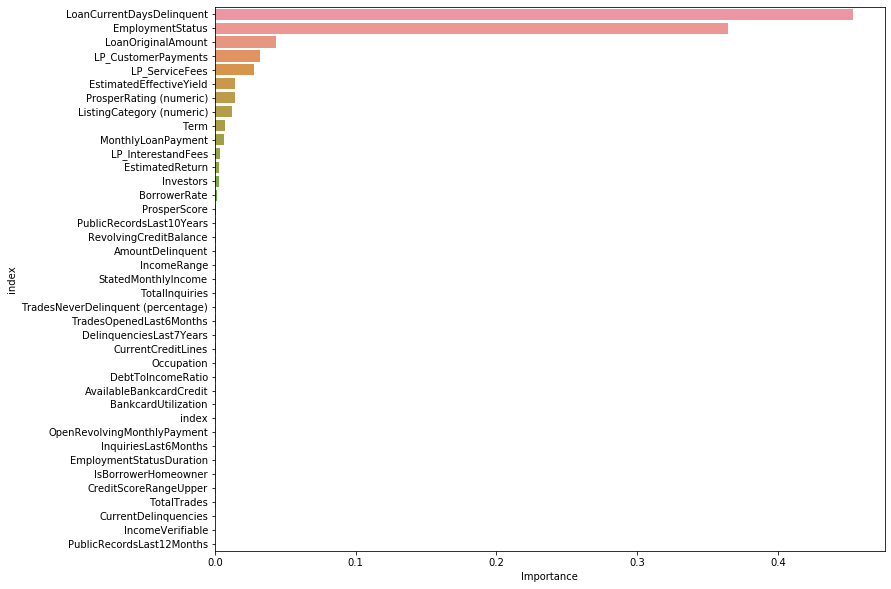

In [128]:
plt.figure(figsize=(12,10))
sns.barplot(data=feat_imp,x='Importance',y='index')
plt.show()

In [119]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

params = {'n_estimators' : [100, 120, 150],
'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015], 
'gamma' : [2, 3, 4, 5, 6],
'max_depth' : [2, 3, 4, 5, 6]}

xgb = XGBClassifier()
grid = HalvingGridSearchCV(estimator = xgb, param_grid = params, cv = 5)
grid_model = grid.fit(X_train, y_xgb_train)

In [120]:
grid_model.best_params_

{'gamma': 2, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 100}

In [130]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.15, gamma = 2, max_depth = 4)
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
#         scores['xgb']['roc_auc'] = roc_auc_score(y_test, y_pred)
    return scores

In [131]:
modelling(X_train, y_xgb_train, X_test, y_xgb_test, xgb=True)

{'xgb': [0.9923639555295495]}

In [132]:
print(classification_report(y_xgb_test, y_xgb_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11363
           1       1.00      0.99      0.99     17069
           2       1.00      1.00      1.00      5748

    accuracy                           0.99     34180
   macro avg       0.99      1.00      0.99     34180
weighted avg       0.99      0.99      0.99     34180



In [133]:
print(classification_report(y_xgb_train,y_xgb_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26916
           1       1.00      1.00      1.00     39507
           2       1.00      1.00      1.00     13329

    accuracy                           1.00     79752
   macro avg       1.00      1.00      1.00     79752
weighted avg       1.00      1.00      1.00     79752



In [135]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
#         scores['rf']['roc_auc'] = roc_auc_score(y_test, y_pred)
    return scores

In [123]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [124]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

   Completed       0.34      0.10      0.16     11469
     Current       0.50      0.90      0.64     17020
   Defaulted       0.19      0.00      0.00      5691

    accuracy                           0.48     34180
   macro avg       0.34      0.33      0.27     34180
weighted avg       0.39      0.48      0.37     34180



In [125]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

   Completed       1.00      1.00      1.00     26810
     Current       1.00      1.00      1.00     39556
   Defaulted       1.00      1.00      1.00     13386

    accuracy                           1.00     79752
   macro avg       1.00      1.00      1.00     79752
weighted avg       1.00      1.00      1.00     79752



In [126]:
params = {'criterion' : ['entropy', 'gini'],
'n_estimators' : [90, 100, 150, 200],
'max_depth' : [10, 15, 20],
'min_samples_split' : [2, 5, 8]}
 
rf = RandomForestClassifier()
grid = HalvingGridSearchCV(estimator = rf, param_grid = params, cv = 5)
grid_model = grid.fit(X_train, y_train)

In [128]:
grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 8,
 'n_estimators': 200}

In [138]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, min_samples_split = 8, n_estimators = 200)
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [139]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

   Completed       0.00      0.00      0.00     11469
     Current       0.50      1.00      0.66     17020
   Defaulted       0.00      0.00      0.00      5691

    accuracy                           0.50     34180
   macro avg       0.17      0.33      0.22     34180
weighted avg       0.25      0.50      0.33     34180



In [140]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

   Completed       1.00      0.00      0.00     26810
     Current       0.50      1.00      0.66     39556
   Defaulted       1.00      0.00      0.00     13386

    accuracy                           0.50     79752
   macro avg       0.83      0.33      0.22     79752
weighted avg       0.75      0.50      0.33     79752



•Conclusion:

Based on the results, it can be concluded that this model can predict loan defaulters with
an accuracy of 99%. Companies can employ similar models and potentially avoid
giving loans to applicants who are highly likely to default. Doing so will reduce risk and
financial loss for lending companies. As with all predictive models, data should be
monitored and re-evaluated on a regular basis.

Though XGB predicts better than Decision Tree, however, in the banking industry,
as per the government regulations and compliance requirements, one should be able to
interpret the model results and clearly explain the reason for declining the loans to the
clients. Hence Decision tree should be used to build the real model for deploying
the same in production. Decision Tree is simple which is a score that is a
combination of coefficients multiplied by features. It can be interpreted as probabilities.
If users are declined the features where their scores were low can be identified and the
account holder can be told how to improve their score 
